# Data Wrangling - Players Clustering

In [1]:
#dependências do projeto

%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv('players_info_cleaned.csv', sep=',')

#mostrar todas as colunas quando printar o dataframe
pd.options.display.max_columns = None

In [3]:
df.shape

(186, 169)

In [4]:
df['match_time'] = df['match_time.1']

## Clusterização

In [5]:

# Function to get best K value for K-means

def getKValue(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(df)
        distortions.append(km.inertia_)

    # plot
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [6]:
#K means Clustering 
def doKmeans(df, nclust):
    model = KMeans(nclust)
    model.fit(df)
    clust_labels = model.predict(df)
    cent = model.cluster_centers_
    return (clust_labels, cent)

### Level do Torneio

In [7]:
df_level = df[['atp_250','atp_500','grand_slam','tour_finals','masters.1']]


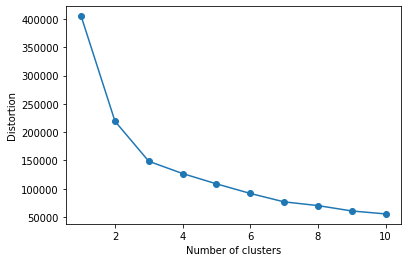

In [8]:
getKValue(df_level)

In [9]:
df_level['labels'], cents = doKmeans(df_level, 2)
df['cluster_level'] = df_level['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


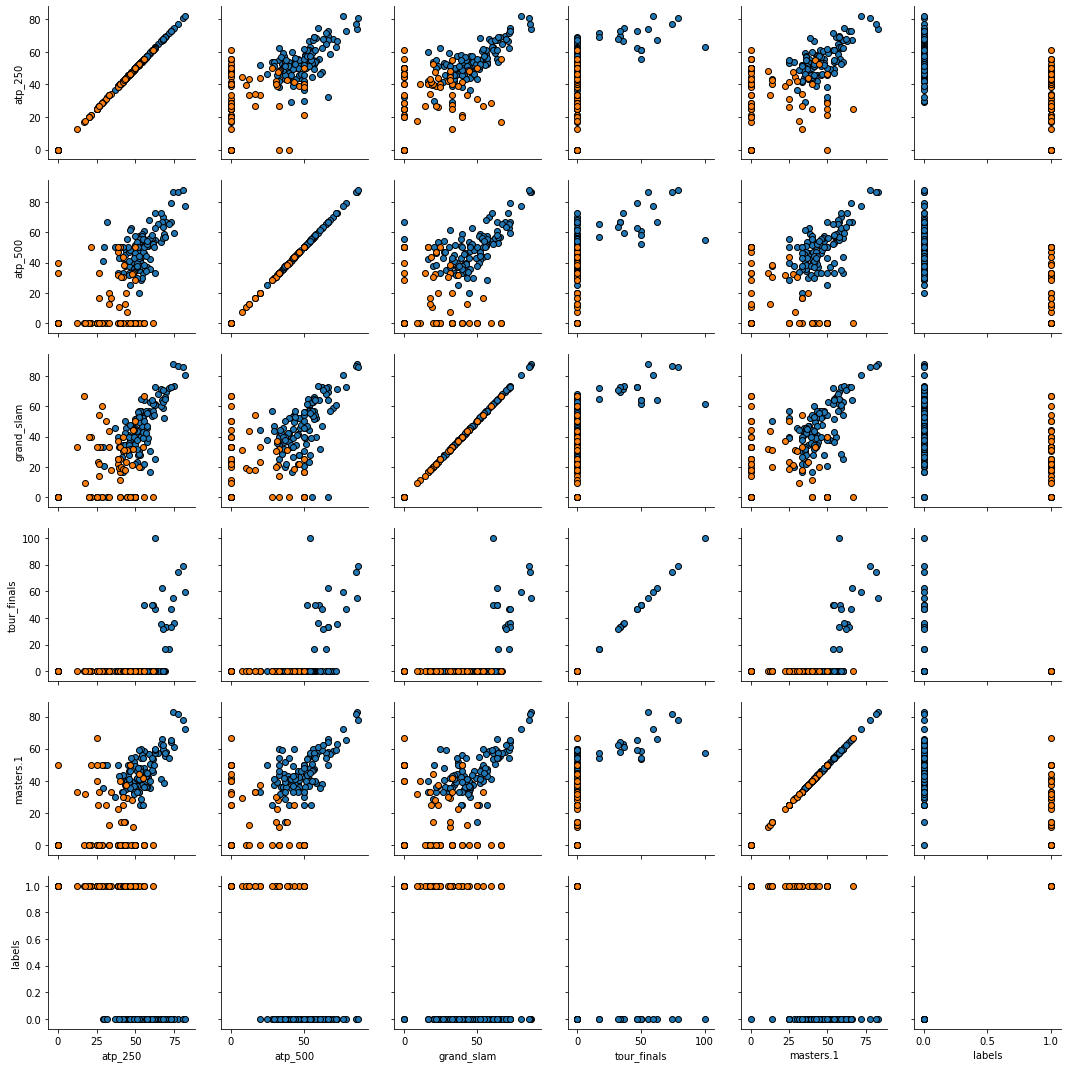

In [10]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_level, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Tipo de Piso

In [11]:
df_piso = df[['hard','clay','grass']]

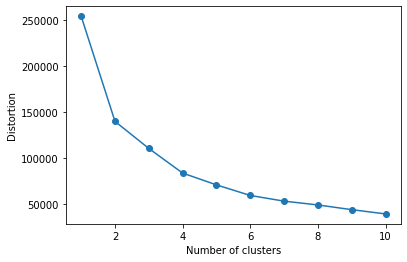

In [12]:
getKValue(df_piso)

In [13]:
df_piso['labels'], cents = doKmeans(df_piso, 2)
df['cluster_piso'] = df_piso['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


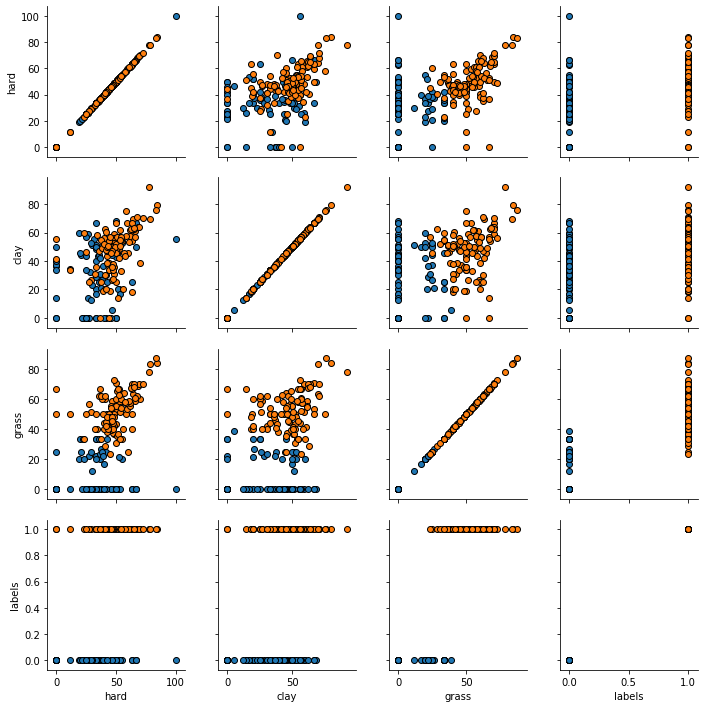

In [14]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_piso, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Situação de Pressão

In [15]:
    df_pressao = df[['deciding_set','fifth_set','after_losing_1st_set','after_winning_1st_set','deciding_set_tie_breaks','tie_breaks']]


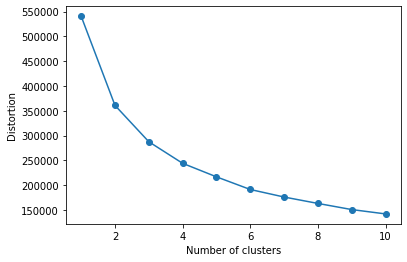

In [16]:
getKValue(df_pressao)

In [17]:
df_pressao['labels'], cents = doKmeans(df_pressao, 2)
df['cluster_pressao'] = df_pressao['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


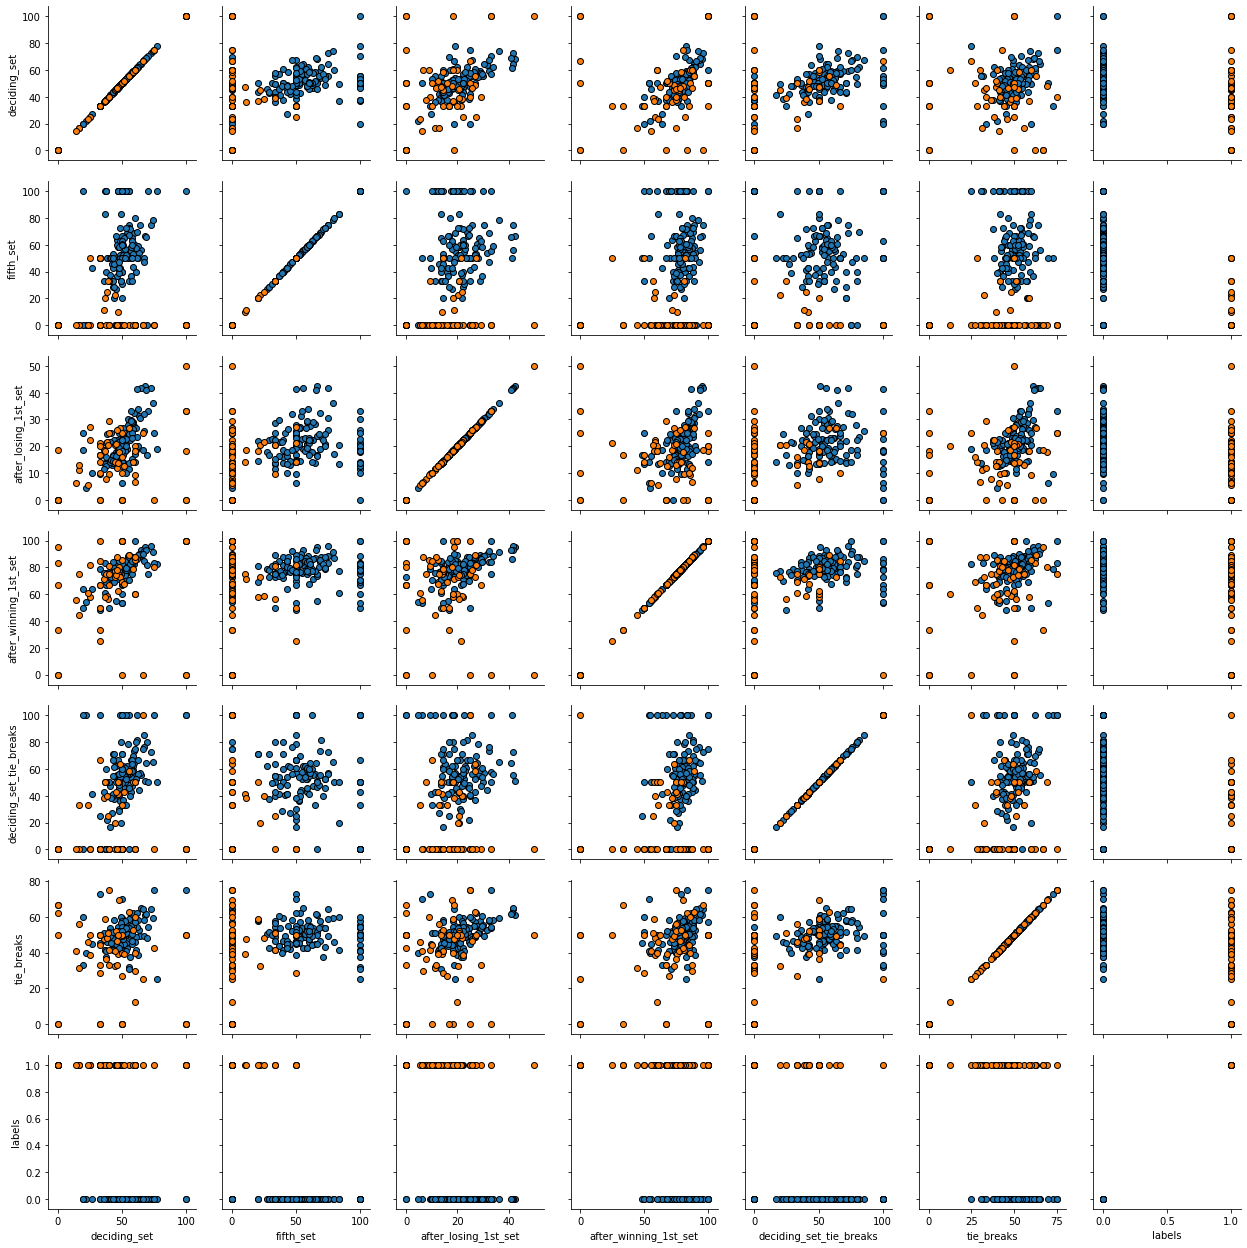

In [18]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_pressao, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Saque

In [19]:
df_saque = df[['ace_%','aces_/_dfs_ratio']]

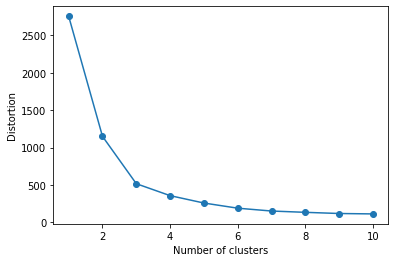

In [20]:
getKValue(df_saque)

In [21]:
df_saque['labels'], cents = doKmeans(df_saque, 3)
df['cluster_saque'] = df_saque['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


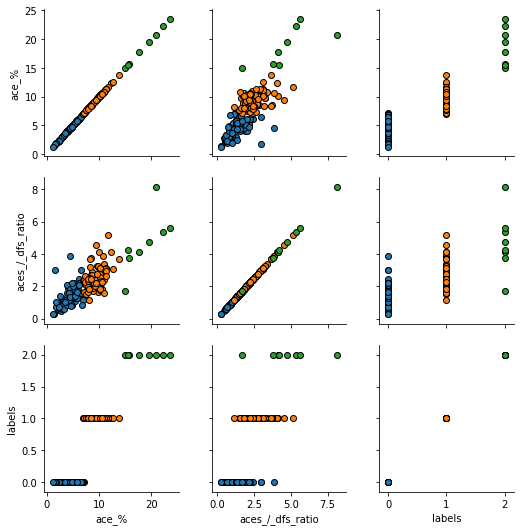

In [22]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_saque, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Dupla Falta


In [23]:
df_duplafalta = df[['double_fault_%','dfs_per_2nd_serve_%','dfs_per_svc._game']]


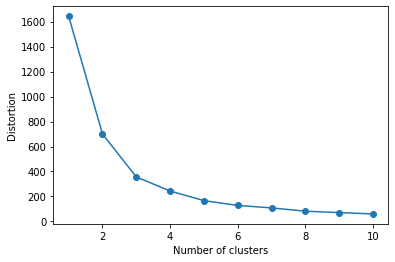

In [24]:
getKValue(df_duplafalta)

In [25]:
df_duplafalta['labels'], cents = doKmeans(df_duplafalta, 2)
df['cluster_duplafalta'] = df_duplafalta['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


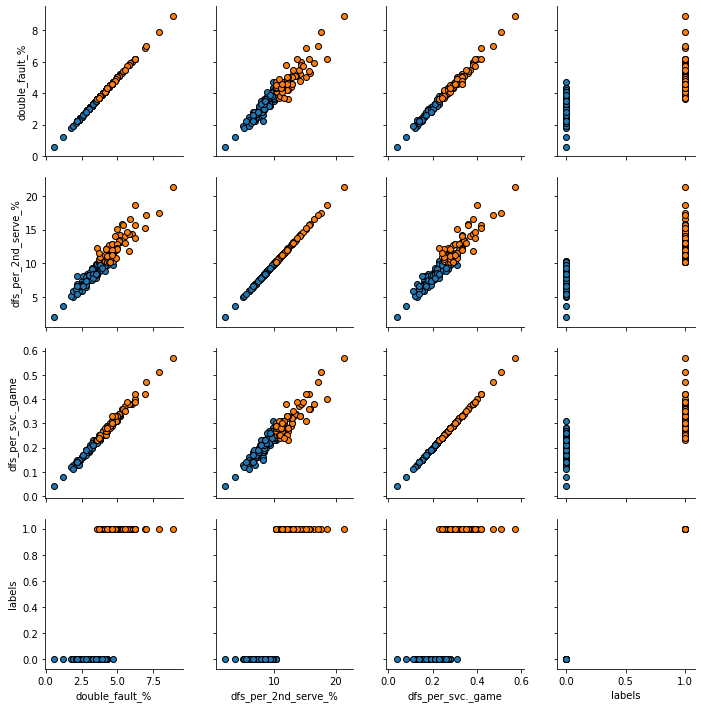

In [26]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_duplafalta, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Game de Serviço

In [27]:
df_servico = df[['1st_serve_%','1st_serve_won_%','2nd_serve_won_%','points_per_service_game',
                    'service_games_won_%']]


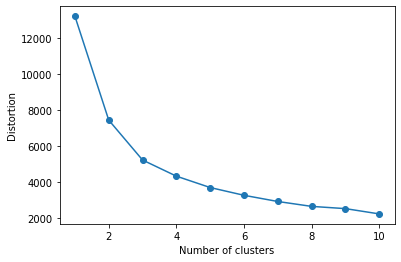

In [28]:
getKValue(df_servico)

In [29]:
df_servico['labels'], cents = doKmeans(df_servico, 3)
df['cluster_servico'] = df_servico['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


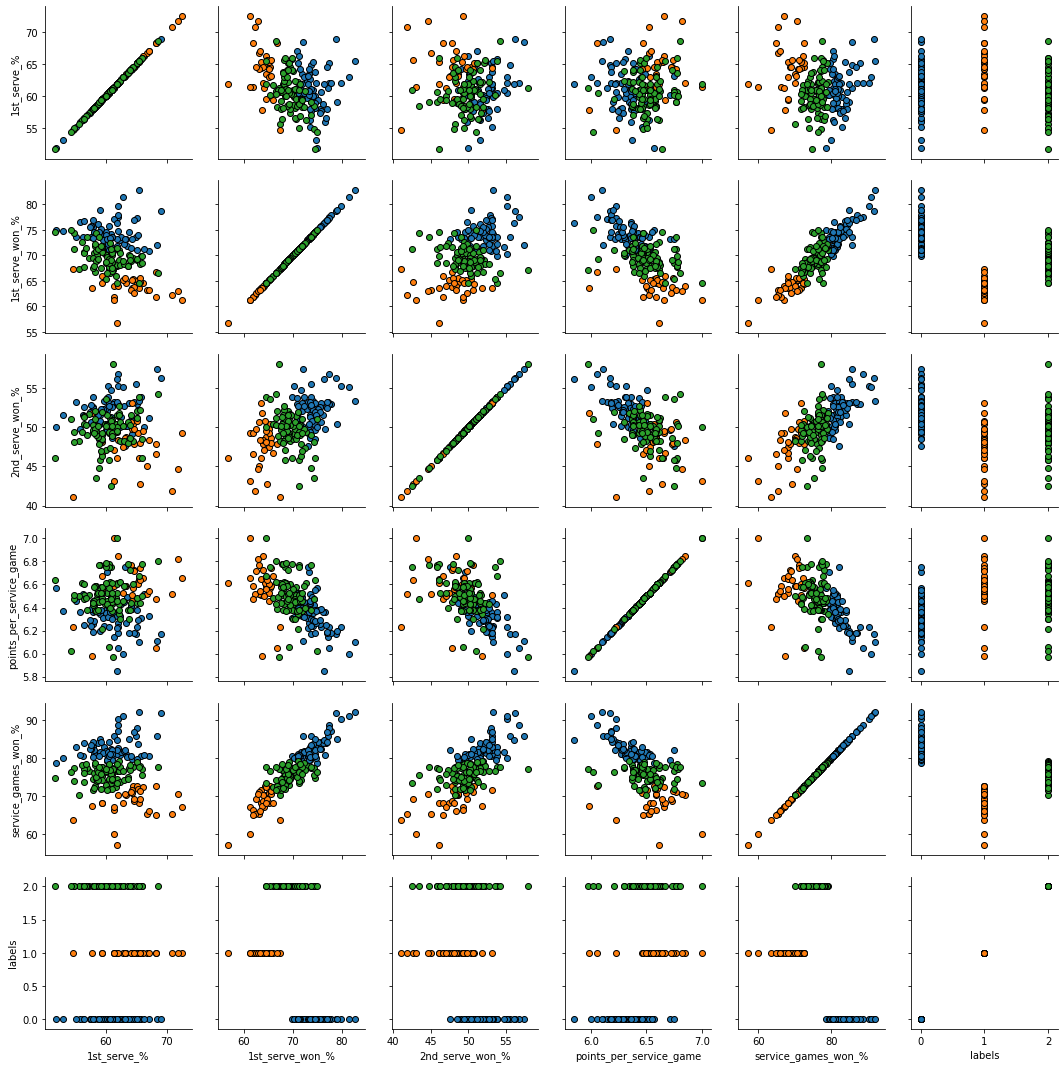

In [30]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_servico, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Game de Retorno

In [31]:
df_gameretorno= df[['1st_srv._return_won_%','2nd_srv._return_won_%','points_per_return_game','return_games_won_%',
                    'ace_against_%','double_fault_against_%']]


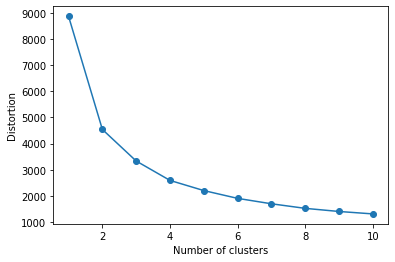

In [32]:
getKValue(df_gameretorno)

In [33]:
df_gameretorno['labels'], cents = doKmeans(df_gameretorno, 4)
df['cluster_retorno'] = df_gameretorno['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


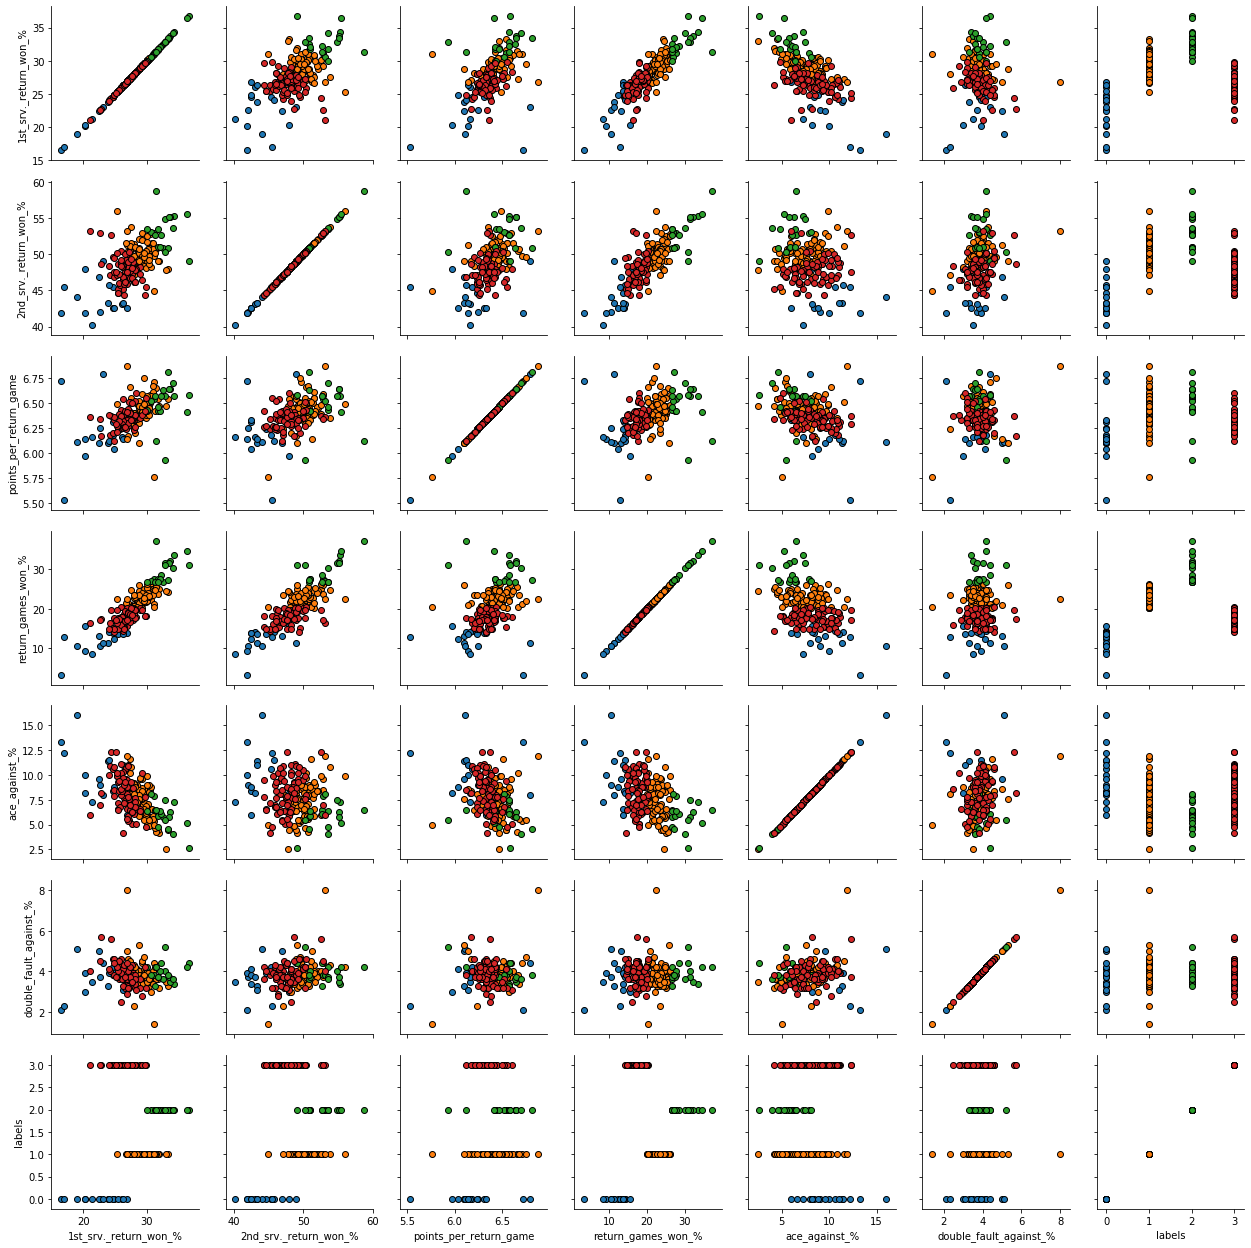

In [34]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_gameretorno, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Break Points Contra

In [35]:
df_bp_contra = df[['bps_faced_per_match','break_points_saved_%']]

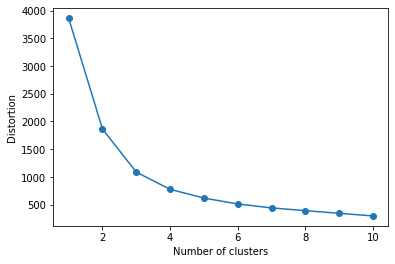

In [36]:
getKValue(df_bp_contra)

In [37]:
df_bp_contra['labels'], cents = doKmeans(df_bp_contra, 3)
df['cluster_bpcontra'] = df_bp_contra['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


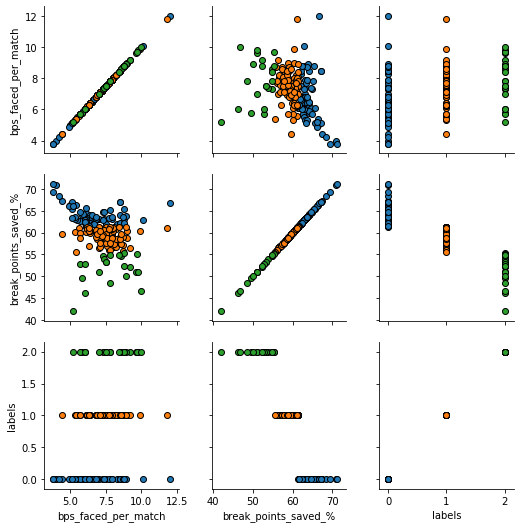

In [38]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_bp_contra, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Break Points a Favor

In [39]:
df_bp_favor = df[['bps_per_match','break_points_won_%']]


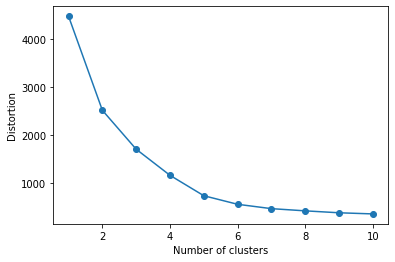

In [40]:
getKValue(df_bp_favor)

In [41]:
df_bp_favor['labels'], cents = doKmeans(df_bp_favor, 3)
df['cluster_bpfavor'] = df_bp_favor['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


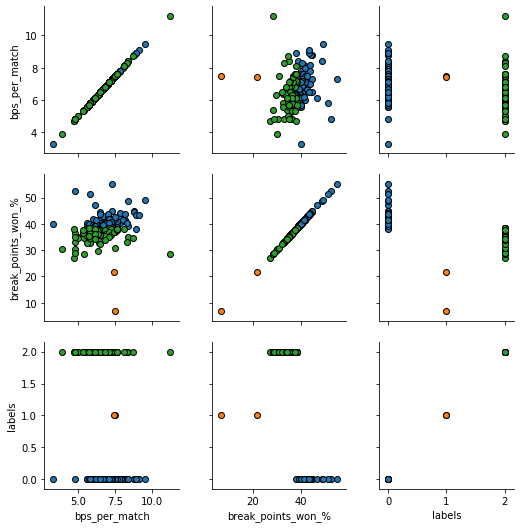

In [42]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_bp_favor, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Pontos

In [43]:
df_pontos = df[['points_per_game','points_per_match','points_per_set','rtn._to_svc._points_ratio',
                'total_points_won_%','point_time']]

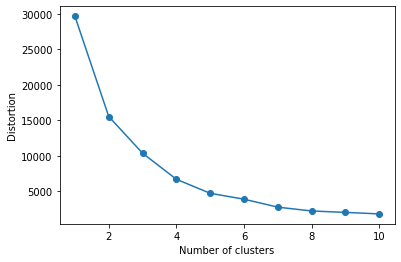

In [44]:
getKValue(df_pontos)

In [45]:
df_pontos['labels'], cents = doKmeans(df_pontos, 3)
df['cluster_pontos'] = df_pontos['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


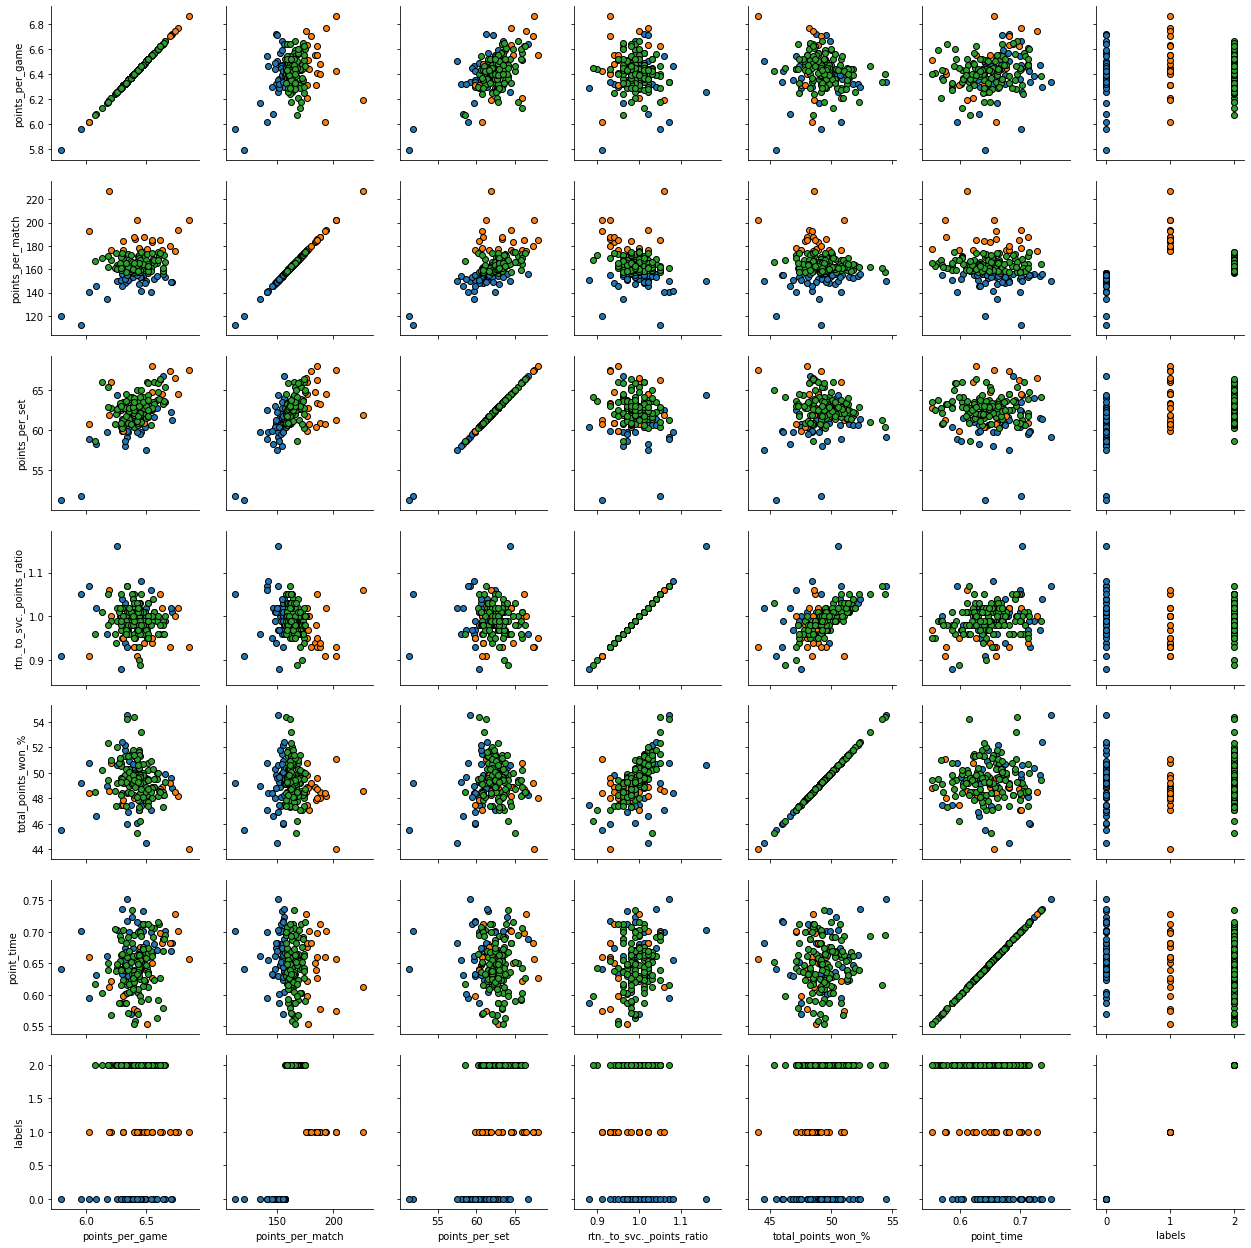

In [46]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_pontos, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Games

In [47]:
df_game = df[['games_per_match','games_per_set','games_won_%','game_time']]


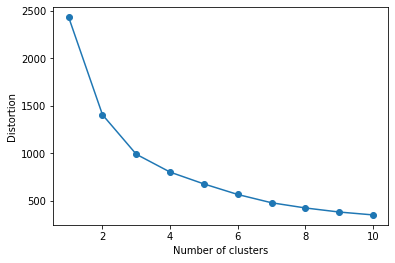

In [48]:
getKValue(df_game)

In [49]:
df_game['labels'], cents = doKmeans(df_game, 3)
df['cluster_game'] = df_game['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


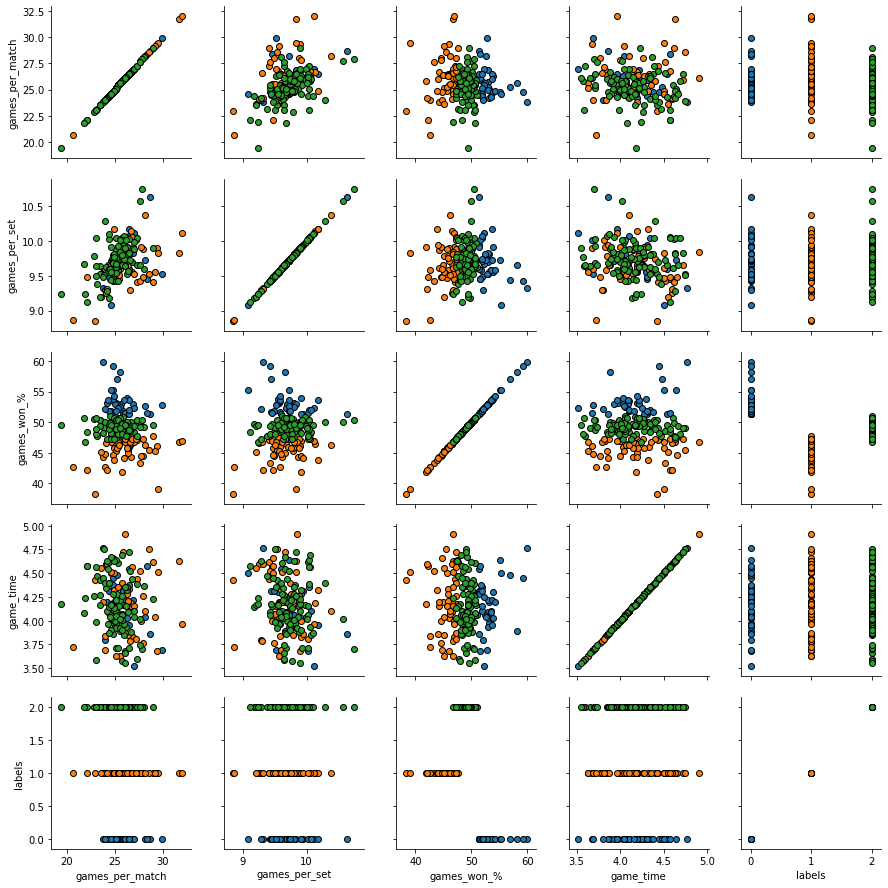

In [50]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_game, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Matches

In [51]:
df_match = df[['sets_per_match','matches_won_%','match_time']]



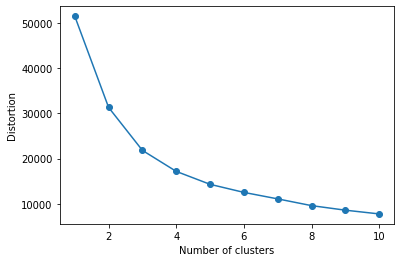

In [52]:
getKValue(df_match)

In [53]:
df_match['labels'], cents = doKmeans(df_match, 2)
df['cluster_match'] = df_match['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


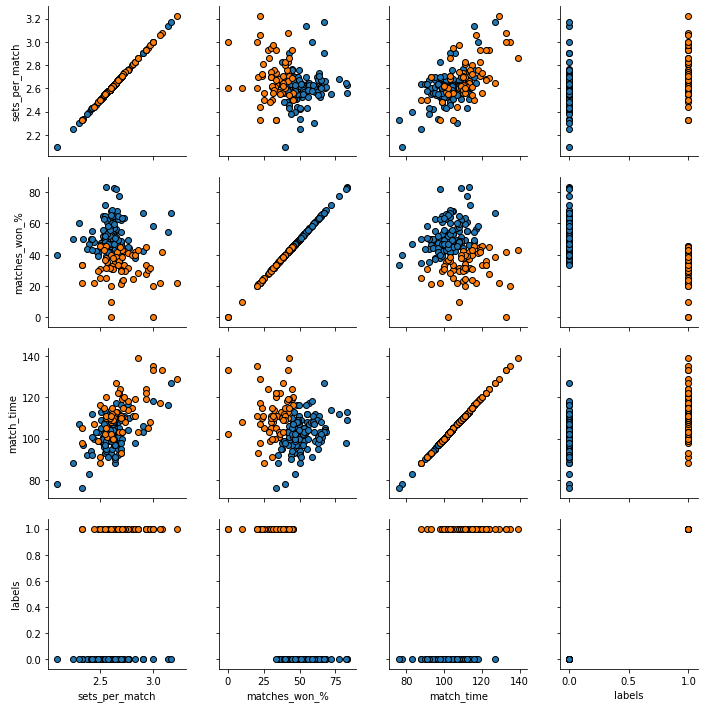

In [54]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_match, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Tie Break

In [55]:
df_tiebreak = df[['tie_breaks_per_match','tie_breaks_won_%']]


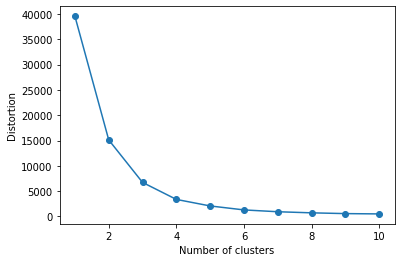

In [56]:
getKValue(df_tiebreak)

In [57]:
df_tiebreak['labels'], cents = doKmeans(df_tiebreak, 3)
df['cluster_tiebreak'] = df_tiebreak['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


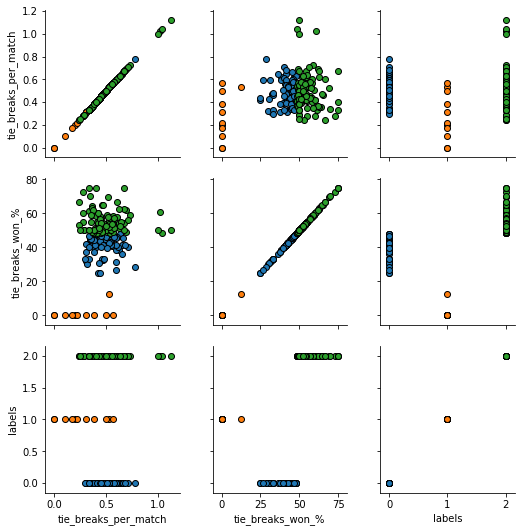

In [58]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_tiebreak, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Upset

In [59]:
df_upset = df[['upsets_%','upsets_against_%','upsets_scored_%']]


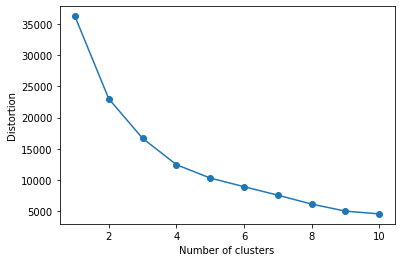

In [60]:
getKValue(df_upset)

In [61]:
df_upset['labels'], cents = doKmeans(df_upset, 3)
df['cluster_upset'] = df_upset['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


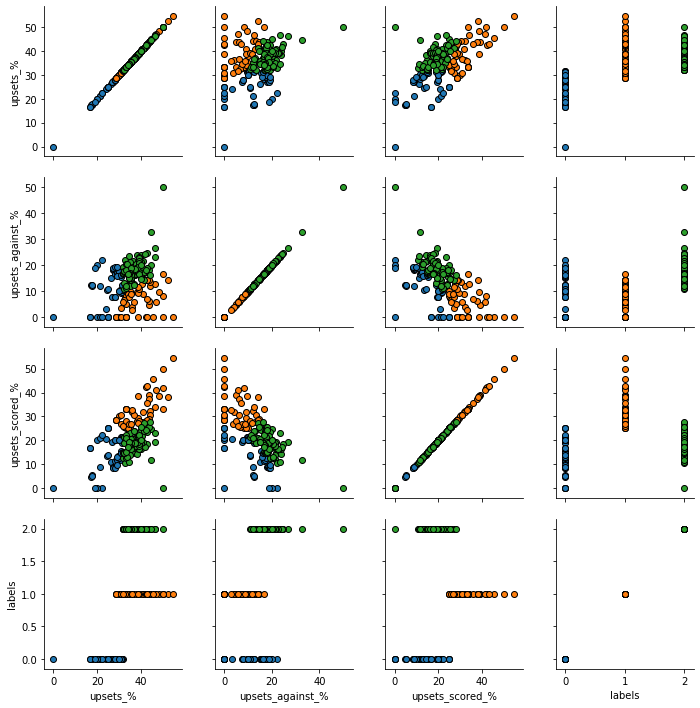

In [62]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_upset, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Dominance

In [63]:
df_dominance = df[['break_points_ratio','games_dominance','points_dominance']]


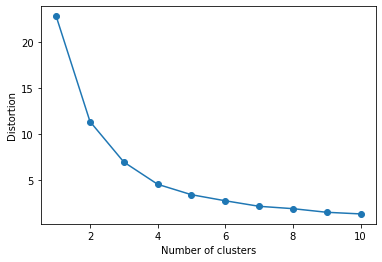

In [64]:
getKValue(df_dominance)

In [65]:
df_dominance['labels'], cents = doKmeans(df_dominance, 3)
df['cluster_dominance'] = df_dominance['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


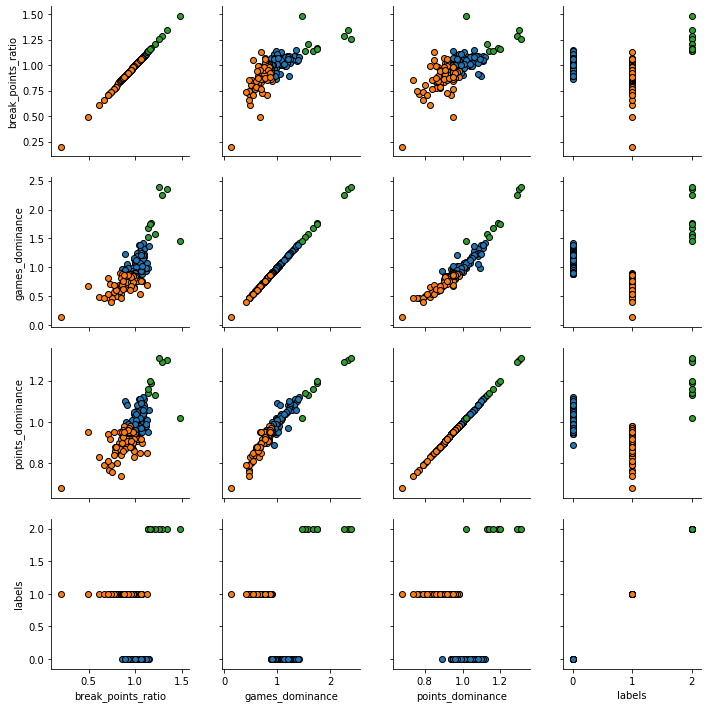

In [66]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_dominance, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Rodada

In [67]:
df_rodada = df[['round_of_128','round_of_16','round_of_32','round_of_64','finals','quarter_final','semi_final']]


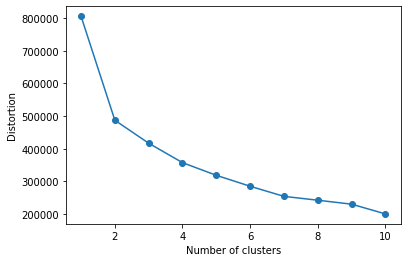

In [68]:
getKValue(df_rodada)

In [69]:
df_rodada['labels'], cents = doKmeans(df_rodada, 5)
df['cluster_rodada'] = df_rodada['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


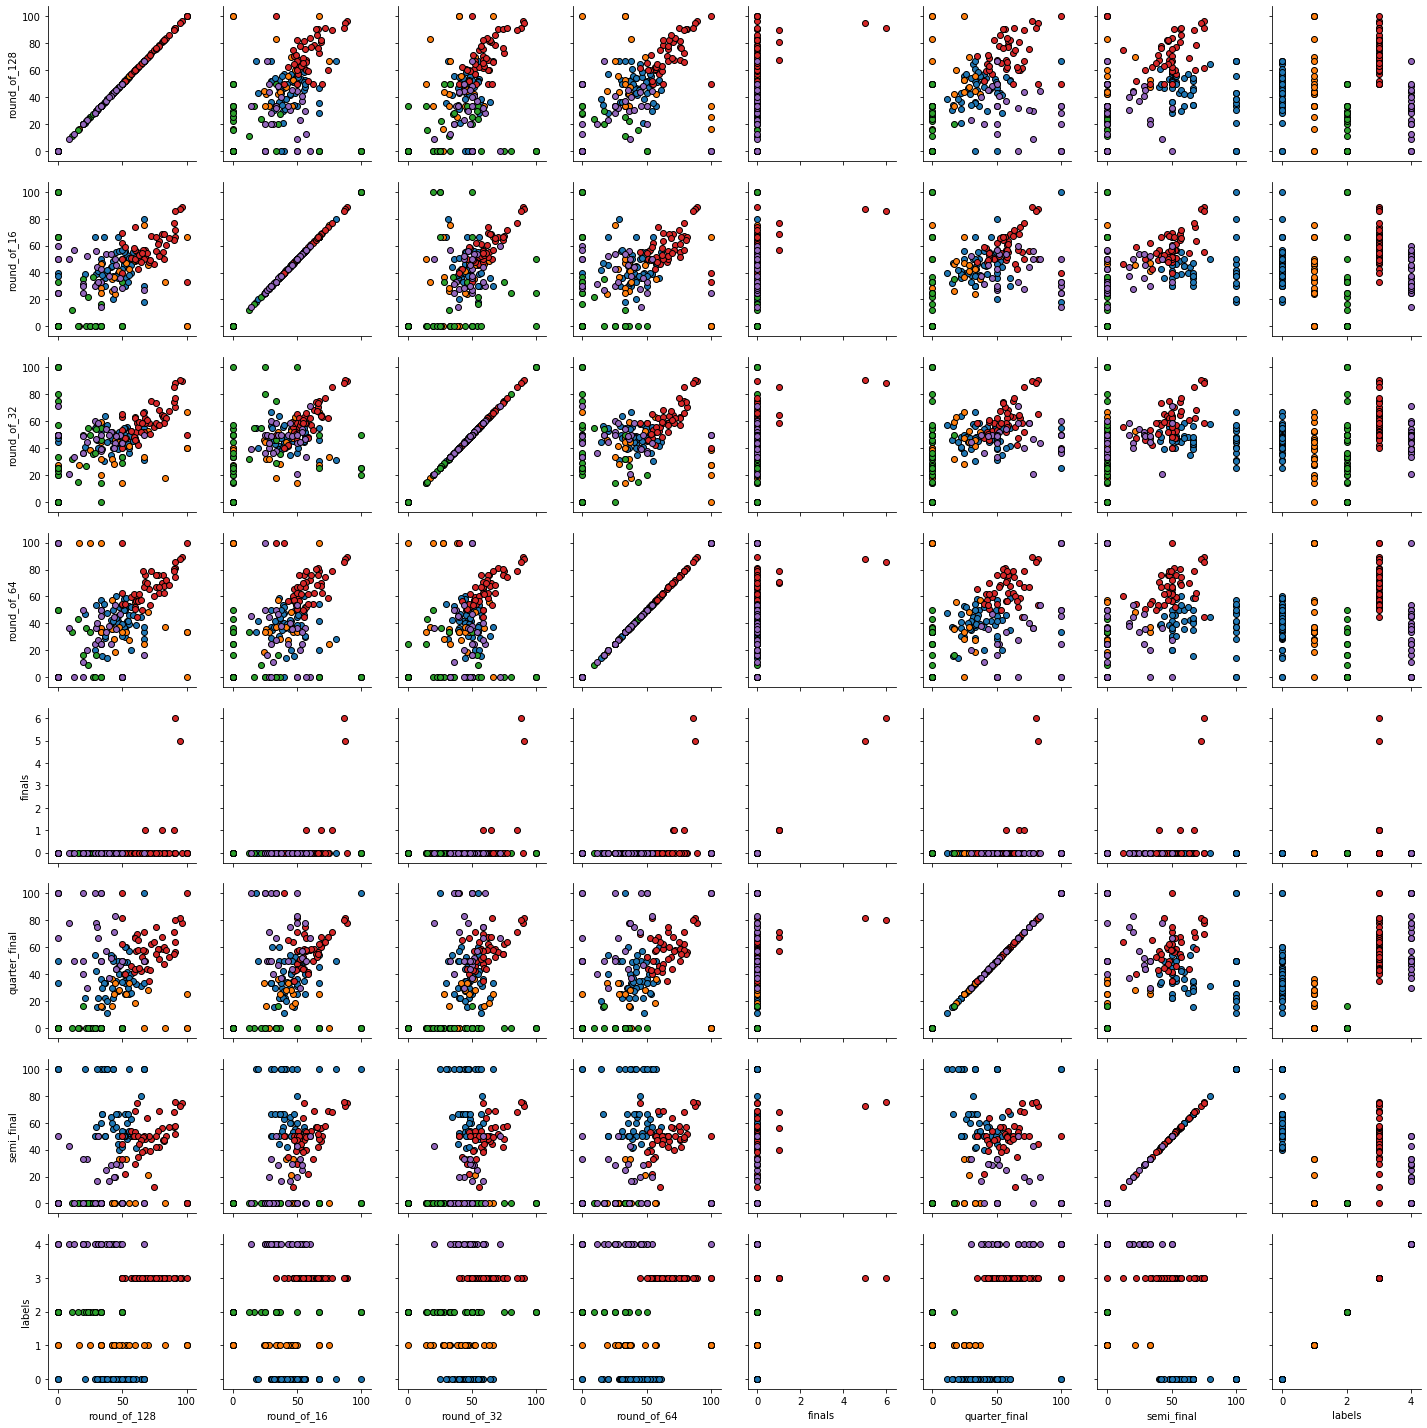

In [70]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_rodada, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Velocidade

In [71]:
df_velocidade = df[['medium','medium_fast','medium_slow','very_fast','slow','fast']]


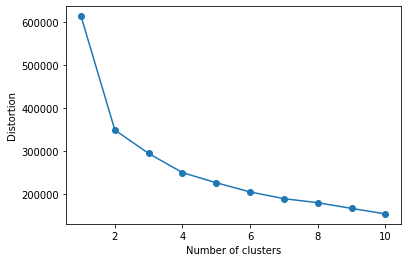

In [72]:
getKValue(df_velocidade)

In [73]:
df_velocidade['labels'], cents = doKmeans(df_velocidade, 3)
df['cluster_velocidade'] = df_velocidade['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


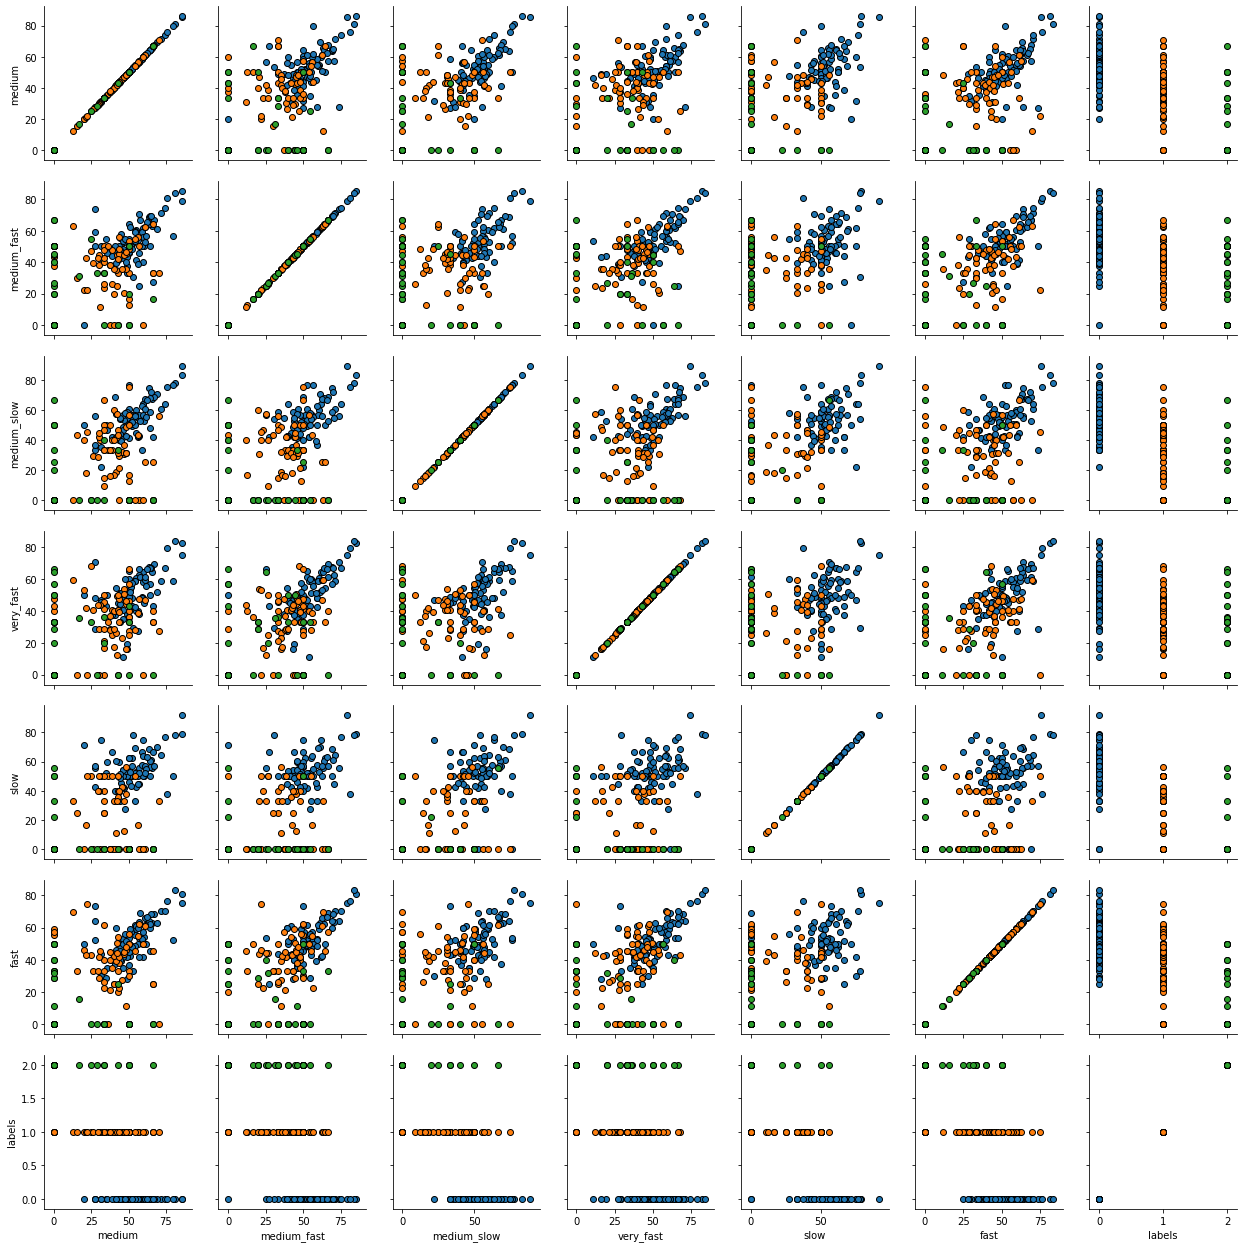

In [74]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_velocidade, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

### Oponente

In [75]:
df_oponente = df[['vs_no._1','vs_top_10','vs_top_100','vs_top_20','vs_top_5','vs_top_50']]


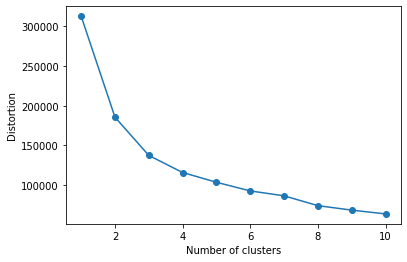

In [76]:
getKValue(df_oponente)

In [77]:
df_oponente['labels'], cents = doKmeans(df_oponente, 3)
df['cluster_oponente'] = df_oponente['labels']

/Users/suzana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


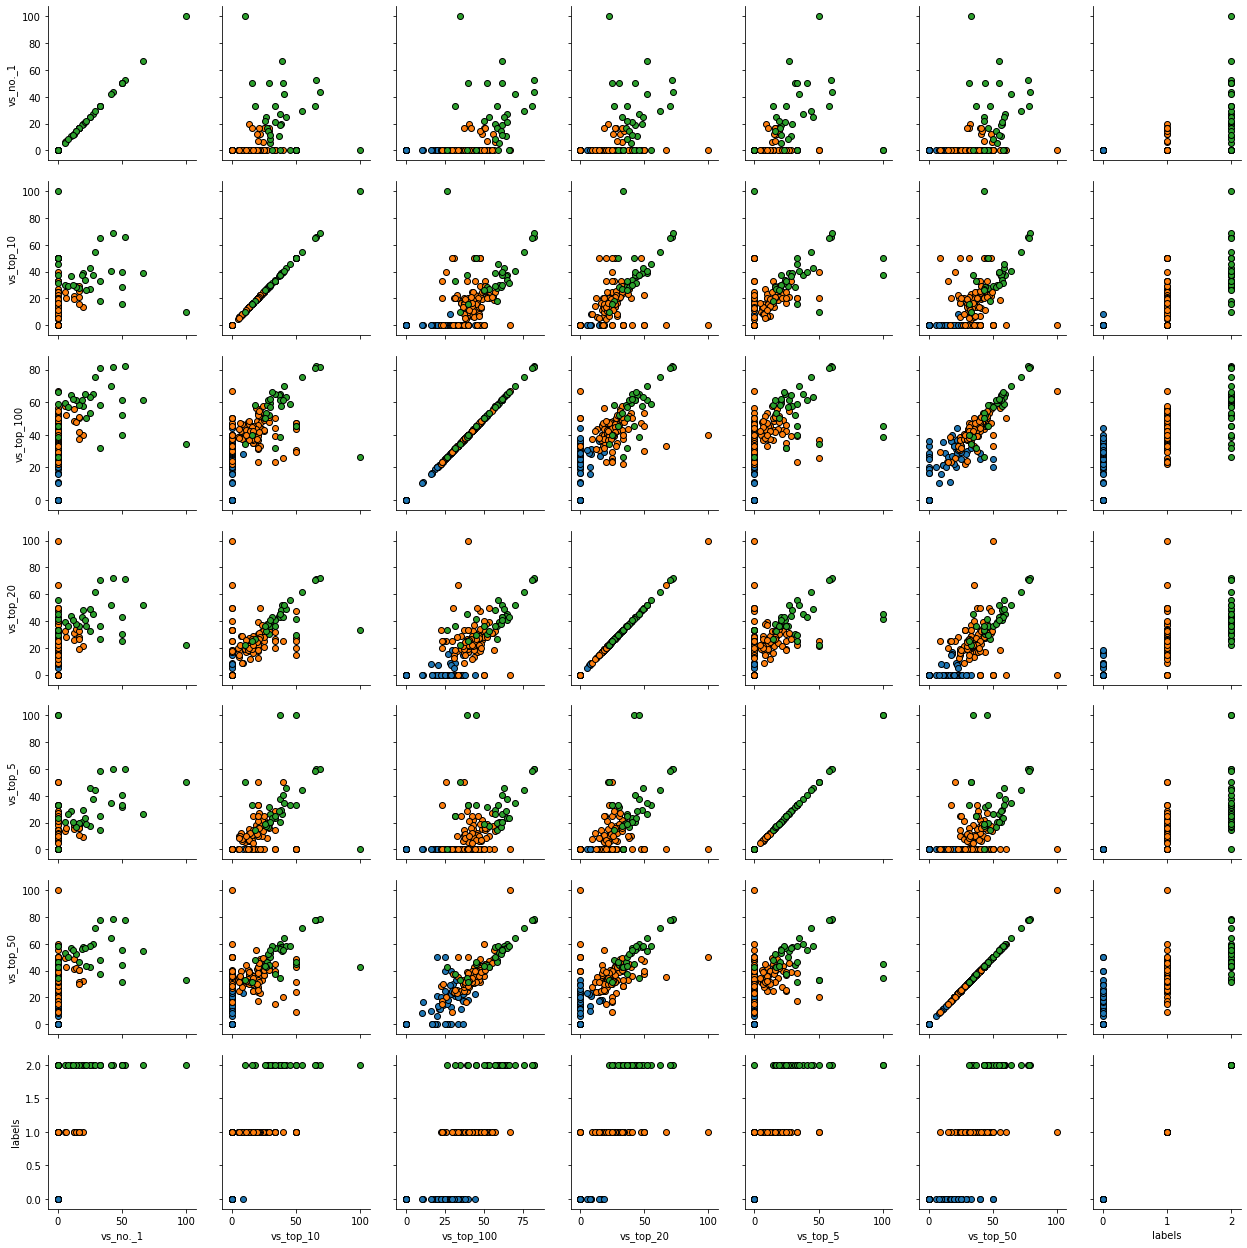

In [78]:
# Seaborn visualization library
import seaborn as sns

g = sns.PairGrid(df_oponente, hue="labels")
g.map(plt.scatter, linewidth=1, edgecolor="k")

In [79]:
new_df = df[['player_id', 'player_name', 'age', 'country', 'favorite_hand', 'backhand', 'turned_pro', 'prize_money', 'titles', 'cluster_level', 'cluster_piso', 'cluster_pressao',
  'cluster_saque', 'cluster_duplafalta', 'cluster_servico', 'cluster_retorno', 'cluster_bpcontra', 'cluster_bpfavor', 'cluster_pontos', 'cluster_game', 'cluster_match', 'cluster_tiebreak',
  'cluster_upset', 'cluster_dominance', 'cluster_rodada', 'cluster_velocidade', 'cluster_oponente']]




## Save Dataset

In [80]:
new_df.to_csv('players_info_clustezition_v2.csv', encoding='utf-8', index=False)